In [3]:
from bs4 import BeautifulSoup
import requests

In [6]:
url = 'https://coinmarketcap.com/currencies/bitcoin'

page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser', from_encoding='utf-8')

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><script type="application/ld+json">{"@context":"https://schema.org/","@type":"Product","name":"Bitcoin","aggregateRating":{"@type":"AggregateRating","ratingValue":4.4,"bestRating":5,"ratingCount":3,"itemReviewed":""}}</script><meta content="https://coinmarketcap.com/currencies/bitcoin/" property="og:url"/><link href="https://coinmarketcap.com/currencies/bitcoin/" rel="canonical"/><link href="https://coinmarketcap.com/ar/currencies/bitcoin/" hreflang="ar" rel="alternate"/><link href="https://coinmarketcap.com/bg/currencies/bitcoin/" hreflang="bg" rel="alternate"/><link href="https://coinmarketcap.com/cs/currencies/bitcoin/" hreflang="cs" rel="alternate"/><link href="https://coinmarketcap.com/da/curren
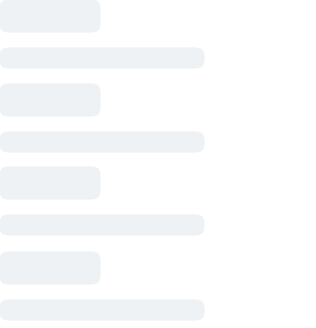

In [11]:
print(soup)

In [12]:
soup.find('span', class_ = 'sc-65e7f566-0 lsTl')

<span class="sc-65e7f566-0 lsTl" data-role="coin-name" title="Bitcoin">Bitcoin<span class="sc-65e7f566-0 eQBACe coin-name-mobile"> price</span></span>

In [24]:
crypto_name = soup.find('span', class_ = 'sc-65e7f566-0 lsTl').contents[0]
print(crypto_name)

Bitcoin


In [25]:
crypto_price = soup.find('span', class_ = 'sc-65e7f566-0 esyGGG base-text').text
print(crypto_price)

$112,991.65


In [26]:
final_price = crypto_price.replace('$', '')
print(final_price)

112,991.65


In [28]:
import pandas as pd

In [37]:
from datetime import datetime

date_time = datetime.now()

print(date_time)

2025-09-22 18:17:08.169978


In [45]:
date_time = datetime.now()

dict = {'Crypto Name':crypto_name,
       'Crypto Price': final_price,
       'Time Stamp': date_time}

df = pd.DataFrame([dict])
df

,Crypto Name,Crypto Price,Time Stamp
0,Bitcoin,"112,991.65",2025-09-22 18:22:32.522386


In [61]:
df.to_csv(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv')
#df.to_excel(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull2.xlsx')

In [51]:
import os

In [59]:
if os.path.exists(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv'):
    df.to_csv(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv', mode='a', header = False)
else:
    df.to_csv(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv')


# All together

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import os
import time

In [5]:
def automated_crypto_pull():
    url = 'https://coinmarketcap.com/currencies/bitcoin'
    
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content, 'html.parser', from_encoding='utf-8')
    
    crypto_name = soup.find('span', class_ = 'sc-65e7f566-0 lsTl').contents[0]
    
    crypto_price = soup.find('span', class_ = 'sc-65e7f566-0 esyGGG base-text').text
    
    final_price = crypto_price.replace('$', '')
    
    date_time = datetime.now()
    
    dict = {'Crypto Name':crypto_name,
           'Crypto Price': final_price,
           'Time Stamp': date_time}
    
    df = pd.DataFrame([dict])
    
    if os.path.exists(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv'):
        df.to_csv(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv', mode='a', header = False)
    else:
        df.to_csv(r'C:\Users\37061\Desktop\Python Tutorial\Crypto Web Puller\Crypto_Automated_Pull.csv')


In [ ]:
while True:
    automated_crypto_pull()
    time.sleep(3600)